# Cifar - 100 이미지 분류

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
seed = 2021
np.random.rand(seed)
tf.random.set_seed(seed)

In [2]:
BATCH_SIZE = 32
NUM_CLASSES = 100
EPOCHS = 100
MODEL_PATH = 'model/best_cifar-100.h5'

## 데이터 전처리

In [3]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

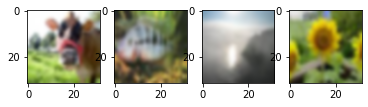

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation='bicubic')
plt.subplot(142)
plt.imshow(X_train[4], interpolation='bicubic')
plt.subplot(143)
plt.imshow(X_train[8], interpolation='bicubic')
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic')
plt.show()

In [6]:
# 0~1 사이로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 100), (10000, 100))

## 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
model = Sequential([ 
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25), 

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')        
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [10]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
import os
if not os.path.exists('model'):
    os.mkdir('model')
checkpointer = ModelCheckpoint(
    MODEL_PATH, verbose=1, save_best_only=True
)
early_stopping = EarlyStopping(patience=10)

In [ ]:
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    callbacks=[checkpointer, early_stopping]
)

In [ ]:
best_model = load_model(MODEL_PATH)
best_model.evaluate(X_test, Y_test)